# Open PTU files
This notebook opens ".ptu" files.

## Set data path

In [1]:
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import napari

In [2]:
data_path = "C:/Users/mazo260d/Desktop/Conni_BiA_PoL/copied_for_Marcelo/single_image/raw_FLIM_data/single_FLIM_image.ptu"
# data_path = "C:/Users/cblei/Desktop/miniSabb_local/FLIM_file_formats/single_FLIM_image.ptu"

In [3]:
data_path = Path(data_path)
print(data_path)

C:\Users\mazo260d\Desktop\Conni_BiA_PoL\copied_for_Marcelo\single_image\raw_FLIM_data\single_FLIM_image.ptu


## Open ptu file

https://github.com/SumeetRohilla/readPTU_FLIM

In [4]:
from readPTU_FLIM import PTUreader

In [5]:
ptu_file = PTUreader(data_path, print_header_data = False)

TCSPC Hardware: PicoHarpT3
Raw Data has been Read!



In [32]:
ptu_file._print_ptu_head()

Head ID                        Value   
File_GUID                      40      
File_CreatingTime              13301658052.442
$StartedByRemoteInterface      1       
Measurement_SubMode            3       
File_Comment                           
TTResult_StopReason            1       
Fast_Load_End                  0       
CreatorSW_Name                 SymPhoTime 64
CreatorSW_Version              1.6     
CreatorSW_SVNBuild             3224    
CreatorSW_Modules              0       
$ReqHdr_RecordVersion          16777728
$ReqHdr_MeasurementType        1       
$ReqHdr_PixelNumber_X          512     
$ReqHdr_PixelNumber_Y          512     
$ReqHdr_ScanningPattern        0       
$ReqHdr_SpatialResolution      0.07035765166
$Filename                      single_FLIM_image
$Comment                               
$Groupname                     single_FLIM_image
ImgHdr_Dimensions              3       
ImgHdr_Ident                   3       
ImgHdr_PixX                    512     
ImgHd

## get FLIM data

In [7]:
flim_data_stack, intensity_image = ptu_file.get_flim_data_stack()

In [8]:
flim_data_stack.shape

(512, 512, 2, 270)

In [9]:
intensity_image.shape

(512, 512)

## plot intensity image

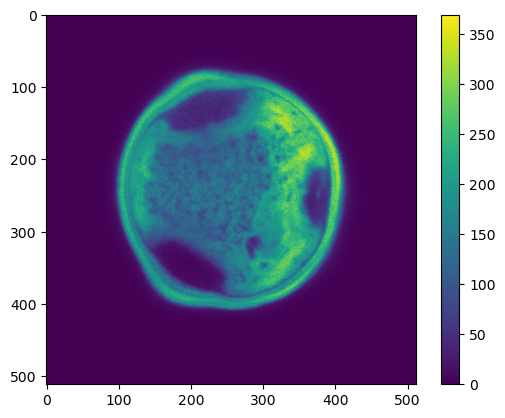

In [10]:
plt.imshow(intensity_image)
plt.colorbar()

## Display in napari

Re-arange axes to have (x,y) by the end

In [11]:
flim_data_stack_for_napari = np.moveaxis(flim_data_stack, [0, 1], [-2, -1])

Get only first channel (the second channel for this image is empty)

In [12]:
flim_data_stack_for_napari = flim_data_stack_for_napari[0, :, :, :]

In [13]:
flim_data_stack_for_napari.shape

(270, 512, 512)

Open napari viewer

In [14]:
viewer = napari.Viewer()

Add image (time-series) to napari

In [15]:
viewer.add_image(flim_data_stack_for_napari)

<Image layer 'flim_data_stack_for_napari' at 0x26238523340>

## Plot pixel over time

In [28]:
total_time_points = flim_data_stack_for_napari.shape[0]
total_time_points

270

In [33]:
laser_frequency = 40 # MHz
laser_time_window = 1 / (laser_frequency * 10**6)
laser_time_window_ns = laser_time_window * 10**9
laser_time_window_ns

25.0

In [18]:
pixel = flim_data_stack_for_napari[:,150,150]

In [35]:
time_step = laser_time_window_ns / total_time_points # ns
time_step

0.09259259259259259

In [38]:
time_array = np.arange(0, total_time_points) * time_step

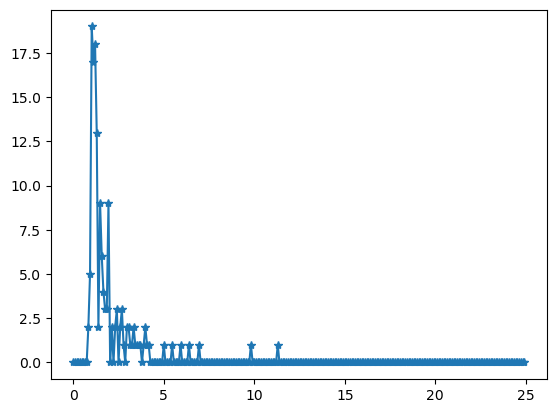

In [42]:
plt.plot(time_array, pixel, '-*')

<BarContainer object of 270 artists>

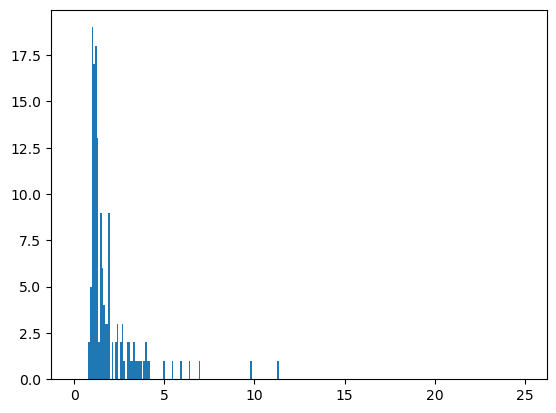

In [54]:
plt.bar(time_array, pixel, width = time_step)

In [55]:
pixel

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  5, 19, 17, 18, 13,  2,  9,
        6,  4,  3,  3,  9,  0,  2,  0,  2,  3,  0,  2,  3,  1,  0,  2,  2,
        1,  1,  2,  1,  1,  1,  1,  0,  1,  2,  1,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [60]:
A = np.arange(24).reshape((2,3,4))
A 

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [61]:
A.shape

(2, 3, 4)

In [65]:
np.sum(A, axis = (1,2))

array([ 66, 210])

In [66]:
np.mean(A, axis = (1,2))

array([ 5.5, 17.5])